<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/1_AnalisisComercio_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpieza de datos

vamos a comenzar limpiando los datos sin procesar del dataset elegido

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Lo primero es revisar columana a columna los posibles problemas y errores que nos pueden surgir.

La colunma InvoiceNO a los datos nos muestra que existen codigos empezados con la letra ‘C’ que llevan unidos valores negativos en la conlumna UnitPrice, esto son devoluciones que hay que eliminar

In [3]:
positive = df.UnitPrice > 0
positive.value_counts()

True     539392
False      2517
Name: UnitPrice, dtype: int64

In [4]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

Hemos visto que los nombres en la columna description son string que contienen espacios en ambos lados y hay que limpiarlos para evitar problemas

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Aun asi, vemos que existe un gran numero de elementos en la columna CustomerID que estan en blanco. Decidimos borrar esas filas ya que ese dato sera necesario en el futuro análisis

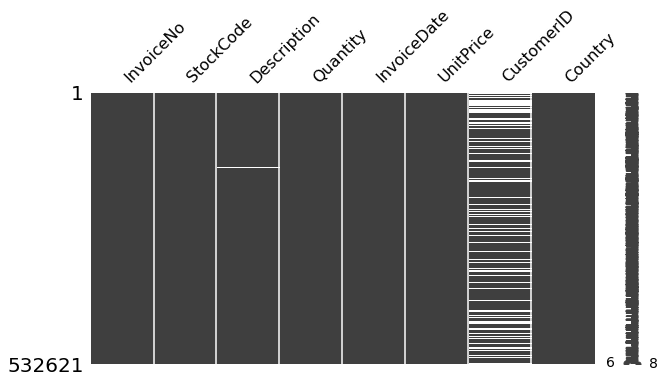

In [6]:
import missingno

missingno.matrix(df,figsize=(10, 5));

In [7]:
df = df.dropna()

In [8]:
df2 = df

Para poder segmentar a los clientes siguiendo un modelo RFM sera necesario calcular el valor total de cada compra.

In [9]:
df2['PrecioTotal'] = df2.Quantity * df2.UnitPrice
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


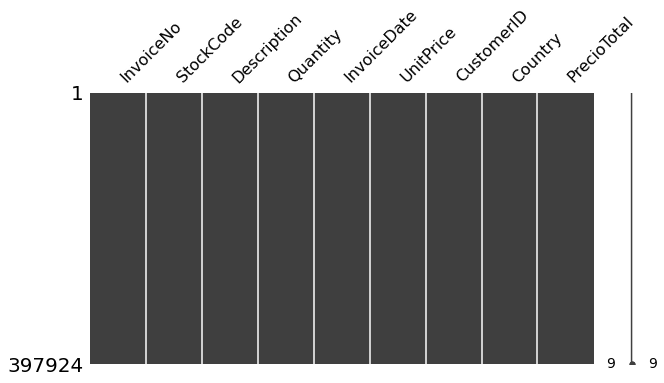

In [10]:
import missingno

missingno.matrix(df,figsize=(10, 5));

el dataset original contiene cerca de 4000 elementos diferentes en la columna description. 
Vamos a seleccionar los 25 elementos mas frecuentes para establecer un Market Basket Analysis en el futuro

In [11]:
df3 = df.groupby('Description').count()
df3

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
10 COLOUR SPACEBOY PEN,243,243,243,243,243,243,243,243
12 COLOURED PARTY BALLOONS,145,145,145,145,145,145,145,145
12 DAISY PEGS IN WOOD BOX,69,69,69,69,69,69,69,69
12 EGG HOUSE PAINTED WOOD,64,64,64,64,64,64,64,64
12 HANGING EGGS HAND PAINTED,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,238,238,238,238,238,238,238,238
ZINC TOP 2 DOOR WOODEN SHELF,9,9,9,9,9,9,9,9
ZINC WILLIE WINKIE CANDLE STICK,192,192,192,192,192,192,192,192


In [12]:
df4 = df3.sort_values('InvoiceNo',ascending=False)
df4

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,2028,2028,2028,2028,2028,2028,2028,2028
REGENCY CAKESTAND 3 TIER,1724,1724,1724,1724,1724,1724,1724,1724
JUMBO BAG RED RETROSPOT,1618,1618,1618,1618,1618,1618,1618,1618
ASSORTED COLOUR BIRD ORNAMENT,1408,1408,1408,1408,1408,1408,1408,1408
PARTY BUNTING,1397,1397,1397,1397,1397,1397,1397,1397
...,...,...,...,...,...,...,...,...
BLACK DIAMOND CLUSTER NECKLACE,1,1,1,1,1,1,1,1
ROSE PENDANT TRIPLE SHELL NECKLACE,1,1,1,1,1,1,1,1
WEEKEND BAG VINTAGE ROSE PAISLEY,1,1,1,1,1,1,1,1


In [13]:
df5 = df4.iloc[:25]
df5

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,2028,2028,2028,2028,2028,2028,2028,2028
REGENCY CAKESTAND 3 TIER,1724,1724,1724,1724,1724,1724,1724,1724
JUMBO BAG RED RETROSPOT,1618,1618,1618,1618,1618,1618,1618,1618
ASSORTED COLOUR BIRD ORNAMENT,1408,1408,1408,1408,1408,1408,1408,1408
PARTY BUNTING,1397,1397,1397,1397,1397,1397,1397,1397
LUNCH BAG RED RETROSPOT,1316,1316,1316,1316,1316,1316,1316,1316
SET OF 3 CAKE TINS PANTRY DESIGN,1159,1159,1159,1159,1159,1159,1159,1159
LUNCH BAG BLACK SKULL.,1105,1105,1105,1105,1105,1105,1105,1105
POSTAGE,1099,1099,1099,1099,1099,1099,1099,1099


In [14]:
df5.index

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'SET OF 3 CAKE TINS PANTRY DESIGN', 'LUNCH BAG  BLACK SKULL.',
       'POSTAGE', 'PACK OF 72 RETROSPOT CAKE CASES',
       'PAPER CHAIN KIT 50'S CHRISTMAS', 'SPOTTY BUNTING',
       'LUNCH BAG SPACEBOY DESIGN', 'LUNCH BAG CARS BLUE',
       'HEART OF WICKER SMALL', 'NATURAL SLATE HEART CHALKBOARD',
       'LUNCH BAG PINK POLKADOT', 'REX CASH+CARRY JUMBO SHOPPER',
       'LUNCH BAG SUKI DESIGN', 'ALARM CLOCK BAKELIKE RED',
       'LUNCH BAG APPLE DESIGN', 'SET OF 4 PANTRY JELLY MOULDS',
       'JUMBO BAG PINK POLKADOT', 'JAM MAKING SET WITH JARS',
       'WOODEN PICTURE FRAME WHITE FINISH'],
      dtype='object', name='Description')

In [15]:
index_description = ['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'SET OF 3 CAKE TINS PANTRY DESIGN', 'LUNCH BAG  BLACK SKULL.',
       'POSTAGE', 'PACK OF 72 RETROSPOT CAKE CASES',
       "PAPER CHAIN KIT 50'S CHRISTMAS", 'SPOTTY BUNTING',
       'LUNCH BAG SPACEBOY DESIGN', 'LUNCH BAG CARS BLUE',
       'HEART OF WICKER SMALL', 'NATURAL SLATE HEART CHALKBOARD',
       'LUNCH BAG PINK POLKADOT', 'REX CASH+CARRY JUMBO SHOPPER',
       'LUNCH BAG SUKI DESIGN', 'ALARM CLOCK BAKELIKE RED',
       'LUNCH BAG APPLE DESIGN', 'SET OF 4 PANTRY JELLY MOULDS',
       'JUMBO BAG PINK POLKADOT', 'JAM MAKING SET WITH JARS',
       'WOODEN PICTURE FRAME WHITE FINISH']

Por un tema de capacidad de procesamiento, dividiremos el dataset en diversas partes.

Cambiamos los elementos que no este entre los 25 mas frecuentes de la columna description por el elemto 'other' para evitar tener un exceso de columnas cuando hagamos el onehotencoder

In [17]:
df6 = df2.iloc[:50000]

In [18]:
for x in range (0, len(df6)):
    if df6.iloc[x,2] in index_description:
        df6.iloc[x,2] == df6.iloc[x,2]
    if df6.iloc[x,2] not in index_description:
        df6.iloc[x,2] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Genera un error pero resuelve bien el loop

In [19]:
df6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
81133,543111,22895,other,2,2011-02-03 12:44:00,2.95,15719.0,United Kingdom,5.90
81134,543111,22897,other,2,2011-02-03 12:44:00,1.45,15719.0,United Kingdom,2.90
81135,543111,21232,other,1,2011-02-03 12:44:00,1.25,15719.0,United Kingdom,1.25
81136,543111,22077,other,2,2011-02-03 12:44:00,1.65,15719.0,United Kingdom,3.30


In [20]:
df7 = df6.groupby('Description').count()

In [21]:
df8 = df7.sort_values('InvoiceNo',ascending=False)
df8

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
other,46667,46667,46667,46667,46667,46667,46667,46667
WHITE HANGING HEART T-LIGHT HOLDER,393,393,393,393,393,393,393,393
REGENCY CAKESTAND 3 TIER,267,267,267,267,267,267,267,267
HEART OF WICKER SMALL,244,244,244,244,244,244,244,244
SET OF 3 CAKE TINS PANTRY DESIGN,196,196,196,196,196,196,196,196
JUMBO BAG RED RETROSPOT,184,184,184,184,184,184,184,184
ASSORTED COLOUR BIRD ORNAMENT,180,180,180,180,180,180,180,180
REX CASH+CARRY JUMBO SHOPPER,170,170,170,170,170,170,170,170
NATURAL SLATE HEART CHALKBOARD,168,168,168,168,168,168,168,168


In [22]:
df9 = df2.iloc[50000:100000]

In [23]:
for x in range (0, len(df9)):
    if df9.iloc[x,2] in index_description:
        df9.iloc[x,2] == df9.iloc[x,2]
    if df9.iloc[x,2] not in index_description:
        df9.iloc[x,2] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [24]:
df13 = df9.groupby('Description').count()
df14 = df13.sort_values('InvoiceNo',ascending=False)
df14

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
other,46238,46238,46238,46238,46238,46238,46238,46238
WHITE HANGING HEART T-LIGHT HOLDER,312,312,312,312,312,312,312,312
REGENCY CAKESTAND 3 TIER,307,307,307,307,307,307,307,307
SET OF 3 CAKE TINS PANTRY DESIGN,281,281,281,281,281,281,281,281
PARTY BUNTING,208,208,208,208,208,208,208,208
JUMBO BAG RED RETROSPOT,206,206,206,206,206,206,206,206
SET OF 4 PANTRY JELLY MOULDS,204,204,204,204,204,204,204,204
PACK OF 72 RETROSPOT CAKE CASES,196,196,196,196,196,196,196,196
ASSORTED COLOUR BIRD ORNAMENT,187,187,187,187,187,187,187,187


In [25]:
df10 = df2.iloc[100000:200000]

In [26]:
for x in range (0, len(df10)):
    if df10.iloc[x,2] in index_description:
        df10.iloc[x,2] == df10.iloc[x,2]
    if df10.iloc[x,2] not in index_description:
        df10.iloc[x,2] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
df15 = df10.groupby('Description').count()
df16 = df15.sort_values('InvoiceNo',ascending=False)
df16

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
other,91211,91211,91211,91211,91211,91211,91211,91211
PARTY BUNTING,686,686,686,686,686,686,686,686
WHITE HANGING HEART T-LIGHT HOLDER,596,596,596,596,596,596,596,596
REGENCY CAKESTAND 3 TIER,522,522,522,522,522,522,522,522
SPOTTY BUNTING,521,521,521,521,521,521,521,521
LUNCH BAG APPLE DESIGN,480,480,480,480,480,480,480,480
JUMBO BAG RED RETROSPOT,465,465,465,465,465,465,465,465
LUNCH BAG RED RETROSPOT,461,461,461,461,461,461,461,461
ASSORTED COLOUR BIRD ORNAMENT,412,412,412,412,412,412,412,412


In [28]:
df11 = df2.iloc[200000:300000]

In [29]:
for x in range (0, len(df11)):
    if df11.iloc[x,2] in index_description:
        df11.iloc[x,2] == df11.iloc[x,2]
    if df11.iloc[x,2] not in index_description:
        df11.iloc[x,2] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
df17 = df11.groupby('Description').count()
df18 = df17.sort_values('InvoiceNo',ascending=False)
df18

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
other,93060,93060,93060,93060,93060,93060,93060,93060
JUMBO BAG RED RETROSPOT,465,465,465,465,465,465,465,465
WHITE HANGING HEART T-LIGHT HOLDER,380,380,380,380,380,380,380,380
REGENCY CAKESTAND 3 TIER,365,365,365,365,365,365,365,365
SPOTTY BUNTING,353,353,353,353,353,353,353,353
LUNCH BAG RED RETROSPOT,347,347,347,347,347,347,347,347
ASSORTED COLOUR BIRD ORNAMENT,331,331,331,331,331,331,331,331
PARTY BUNTING,318,318,318,318,318,318,318,318
PAPER CHAIN KIT 50'S CHRISTMAS,307,307,307,307,307,307,307,307


In [31]:
df12 = df2.iloc[300000:]

In [32]:
for x in range (0, len(df12)):
    if df12.iloc[x,2] in index_description:
        df12.iloc[x,2] == df12.iloc[x,2]
    if df12.iloc[x,2] not in index_description:
        df12.iloc[x,2] = 'other'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [33]:
df19 = df12.groupby('Description').count()
df20 = df19.sort_values('InvoiceNo',ascending=False)
df20

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
Description,,,,,,,,
other,92634,92634,92634,92634,92634,92634,92634,92634
PAPER CHAIN KIT 50'S CHRISTMAS,534,534,534,534,534,534,534,534
WHITE HANGING HEART T-LIGHT HOLDER,347,347,347,347,347,347,347,347
ASSORTED COLOUR BIRD ORNAMENT,298,298,298,298,298,298,298,298
JUMBO BAG RED RETROSPOT,298,298,298,298,298,298,298,298
REX CASH+CARRY JUMBO SHOPPER,279,279,279,279,279,279,279,279
REGENCY CAKESTAND 3 TIER,263,263,263,263,263,263,263,263
POSTAGE,243,243,243,243,243,243,243,243
ALARM CLOCK BAKELIKE RED,225,225,225,225,225,225,225,225


Uniremos finalmente todos los DataFrames que hemos creado para obtener el dataset final tanto limpio como simplificado

In [34]:
df_final = pd.concat([df6, df9, df10, df11, df12], axis=0)

In [35]:
df_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


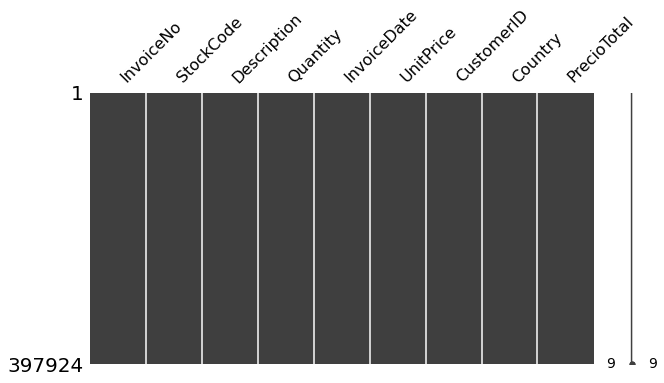

In [36]:
import missingno

missingno.matrix(df,figsize=(10, 5));